In [70]:
#Initilizing operations

import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import plot
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
 
#Algorithm parameters
K = 50
test_cases = 10

datatrain = pd.read_csv('training_data.csv') #Creates a dataframe (pandas datatype)
datatrain

,hour_of_day,day_of_week,month,holiday,weekday,summertime,temp,dew,humidity,precip,snow,snowdepth,windspeed,cloudcover,visibility,increase_stock
0,5,5,1,0,0,0,-7.2,-15.0,53.68,0.000,0,0.0,16.3,31.6,16.0,low_bike_demand
1,21,4,1,0,1,0,-1.3,-12.8,40.97,0.000,0,0.0,23.9,85.7,16.0,low_bike_demand
2,21,3,8,0,1,1,26.9,21.8,73.39,0.000,0,0.0,0.0,81.1,16.0,low_bike_demand
3,1,6,1,0,0,0,3.1,-4.0,59.74,0.000,0,0.0,19.2,0.0,16.0,low_bike_demand
4,17,0,3,0,1,0,11.7,-11.4,18.71,0.000,0,0.0,10.5,44.6,16.0,low_bike_demand
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595,3,5,6,0,0,1,21.5,19.4,87.68,0.000,0,0.0,10.6,24.4,16.0,low_bike_demand
1596,14,0,6,0,1,1,23.2,20.1,82.43,2.217,0,0.0,9.8,92.1,10.4,low_bike_demand
1597,13,0,3,0,1,1,13.9,-2.2,32.93,0.000,0,2.0,18.2,79.3,16.0,low_bike_demand
1598,14,5,3,0,0,1,11.7,-9.3,22.09,0.000,0,0.0,5.8,24.4,16.0,high_bike_demand


In [71]:

def average_list(lst):
    sum = sum(lst)
    len = len(lst)
    return sum/len

In random state  1 the best K value was  27  at a  0.8208333333333333  accuracy score.
In random state  2 the best K value was  33  at a  0.8708333333333333  accuracy score.
In random state  3 the best K value was  16  at a  0.8041666666666667  accuracy score.
In random state  4 the best K value was  20  at a  0.8541666666666666  accuracy score.
In random state  5 the best K value was  26  at a  0.8625  accuracy score.
In random state  6 the best K value was  18  at a  0.8958333333333334  accuracy score.
In random state  7 the best K value was  34  at a  0.8625  accuracy score.
In random state  8 the best K value was  46  at a  0.8333333333333334  accuracy score.
In random state  9 the best K value was  15  at a  0.8625  accuracy score.


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


In random state  10 the best K value was  39  at a  0.8625  accuracy score.


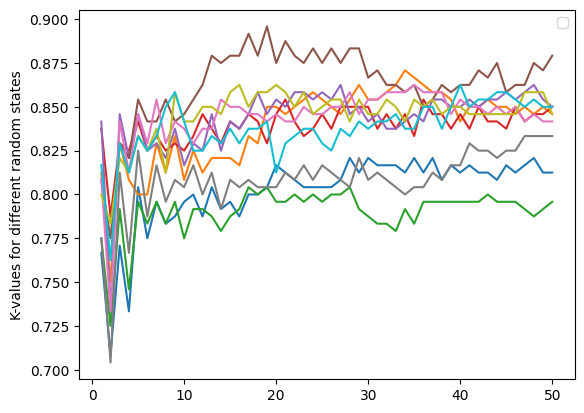

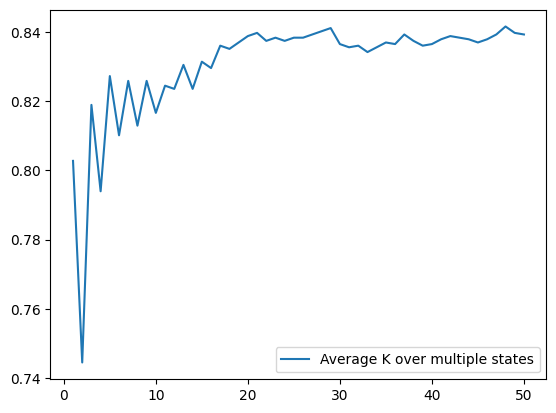

In [72]:


#Sort all variables

#X = datatrain[]
X = datatrain.drop('increase_stock', axis=1)  # Remove the increase stock column, leave only features
Y = datatrain['increase_stock']  # Extract the target column

all_k_values = []
plt.figure()
plt.ylabel('K-values for different random states')

for states in range(test_cases):
    Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.15, random_state=states)
    k_list = []

    for k in range(1,K+1):
        #Implement algorithm
        KNN = KNeighborsClassifier(n_neighbors=k) #Initiate the algorithm method
        KNN.fit(Xtrain, Ytrain) #Fit the algorithm to our training set
        Ypred = KNN.predict(Xtest) # Based on our KNN we now make predctions for our test set
        #Evaluate results 
        k_list.append(accuracy_score(Ytest, Ypred))
        #print('K Value: ', k ,'\nAccuracy Score: ', accuracy_score(Ytest, Ypred), '\nClassifications Report:\n', classification_report(Ytest, Ypred), '\nConfusion matrix: \n', confusion_matrix(Ytest,Ypred), '\n\n\n')

    plot(range(1,K+1), k_list)

    #Find maximum k value 
    max_k = max(k_list)
    #Find the index of the maximum value
    max_k_index = k_list.index(max_k)
    print('In random state ', states+ 1, 'the best K value was ', max_k_index, ' at a ', max_k, ' accuracy score.')
    all_k_values.append(k_list)
plt.legend()
mean_k = []

for i in range(K):
    temp = 0
    for j in range(states):
        temp += all_k_values[j][i]
    mean_k.append(temp/states)
    
plt.figure()
plot(range(1,K+1), mean_k, label='Average K over multiple states')
plt.legend()